### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



In [1]:
import warnings
warnings.filterwarnings('ignore')

# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [2]:
df = pd.read_csv("vehicle.csv")  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [5]:
df.columns[df.isna().any() == True]

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1',
       'skewness_about', 'skewness_about.1', 'skewness_about.2'],
      dtype='object')

In [6]:
df_dropped_na = df.dropna()
df_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [7]:
df_dropped_na['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### 2. Print/ Plot the dependent (categorical variable) - Class column

In [8]:
df_dropped_na['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

Since the variable is categorical, you can use value_counts function

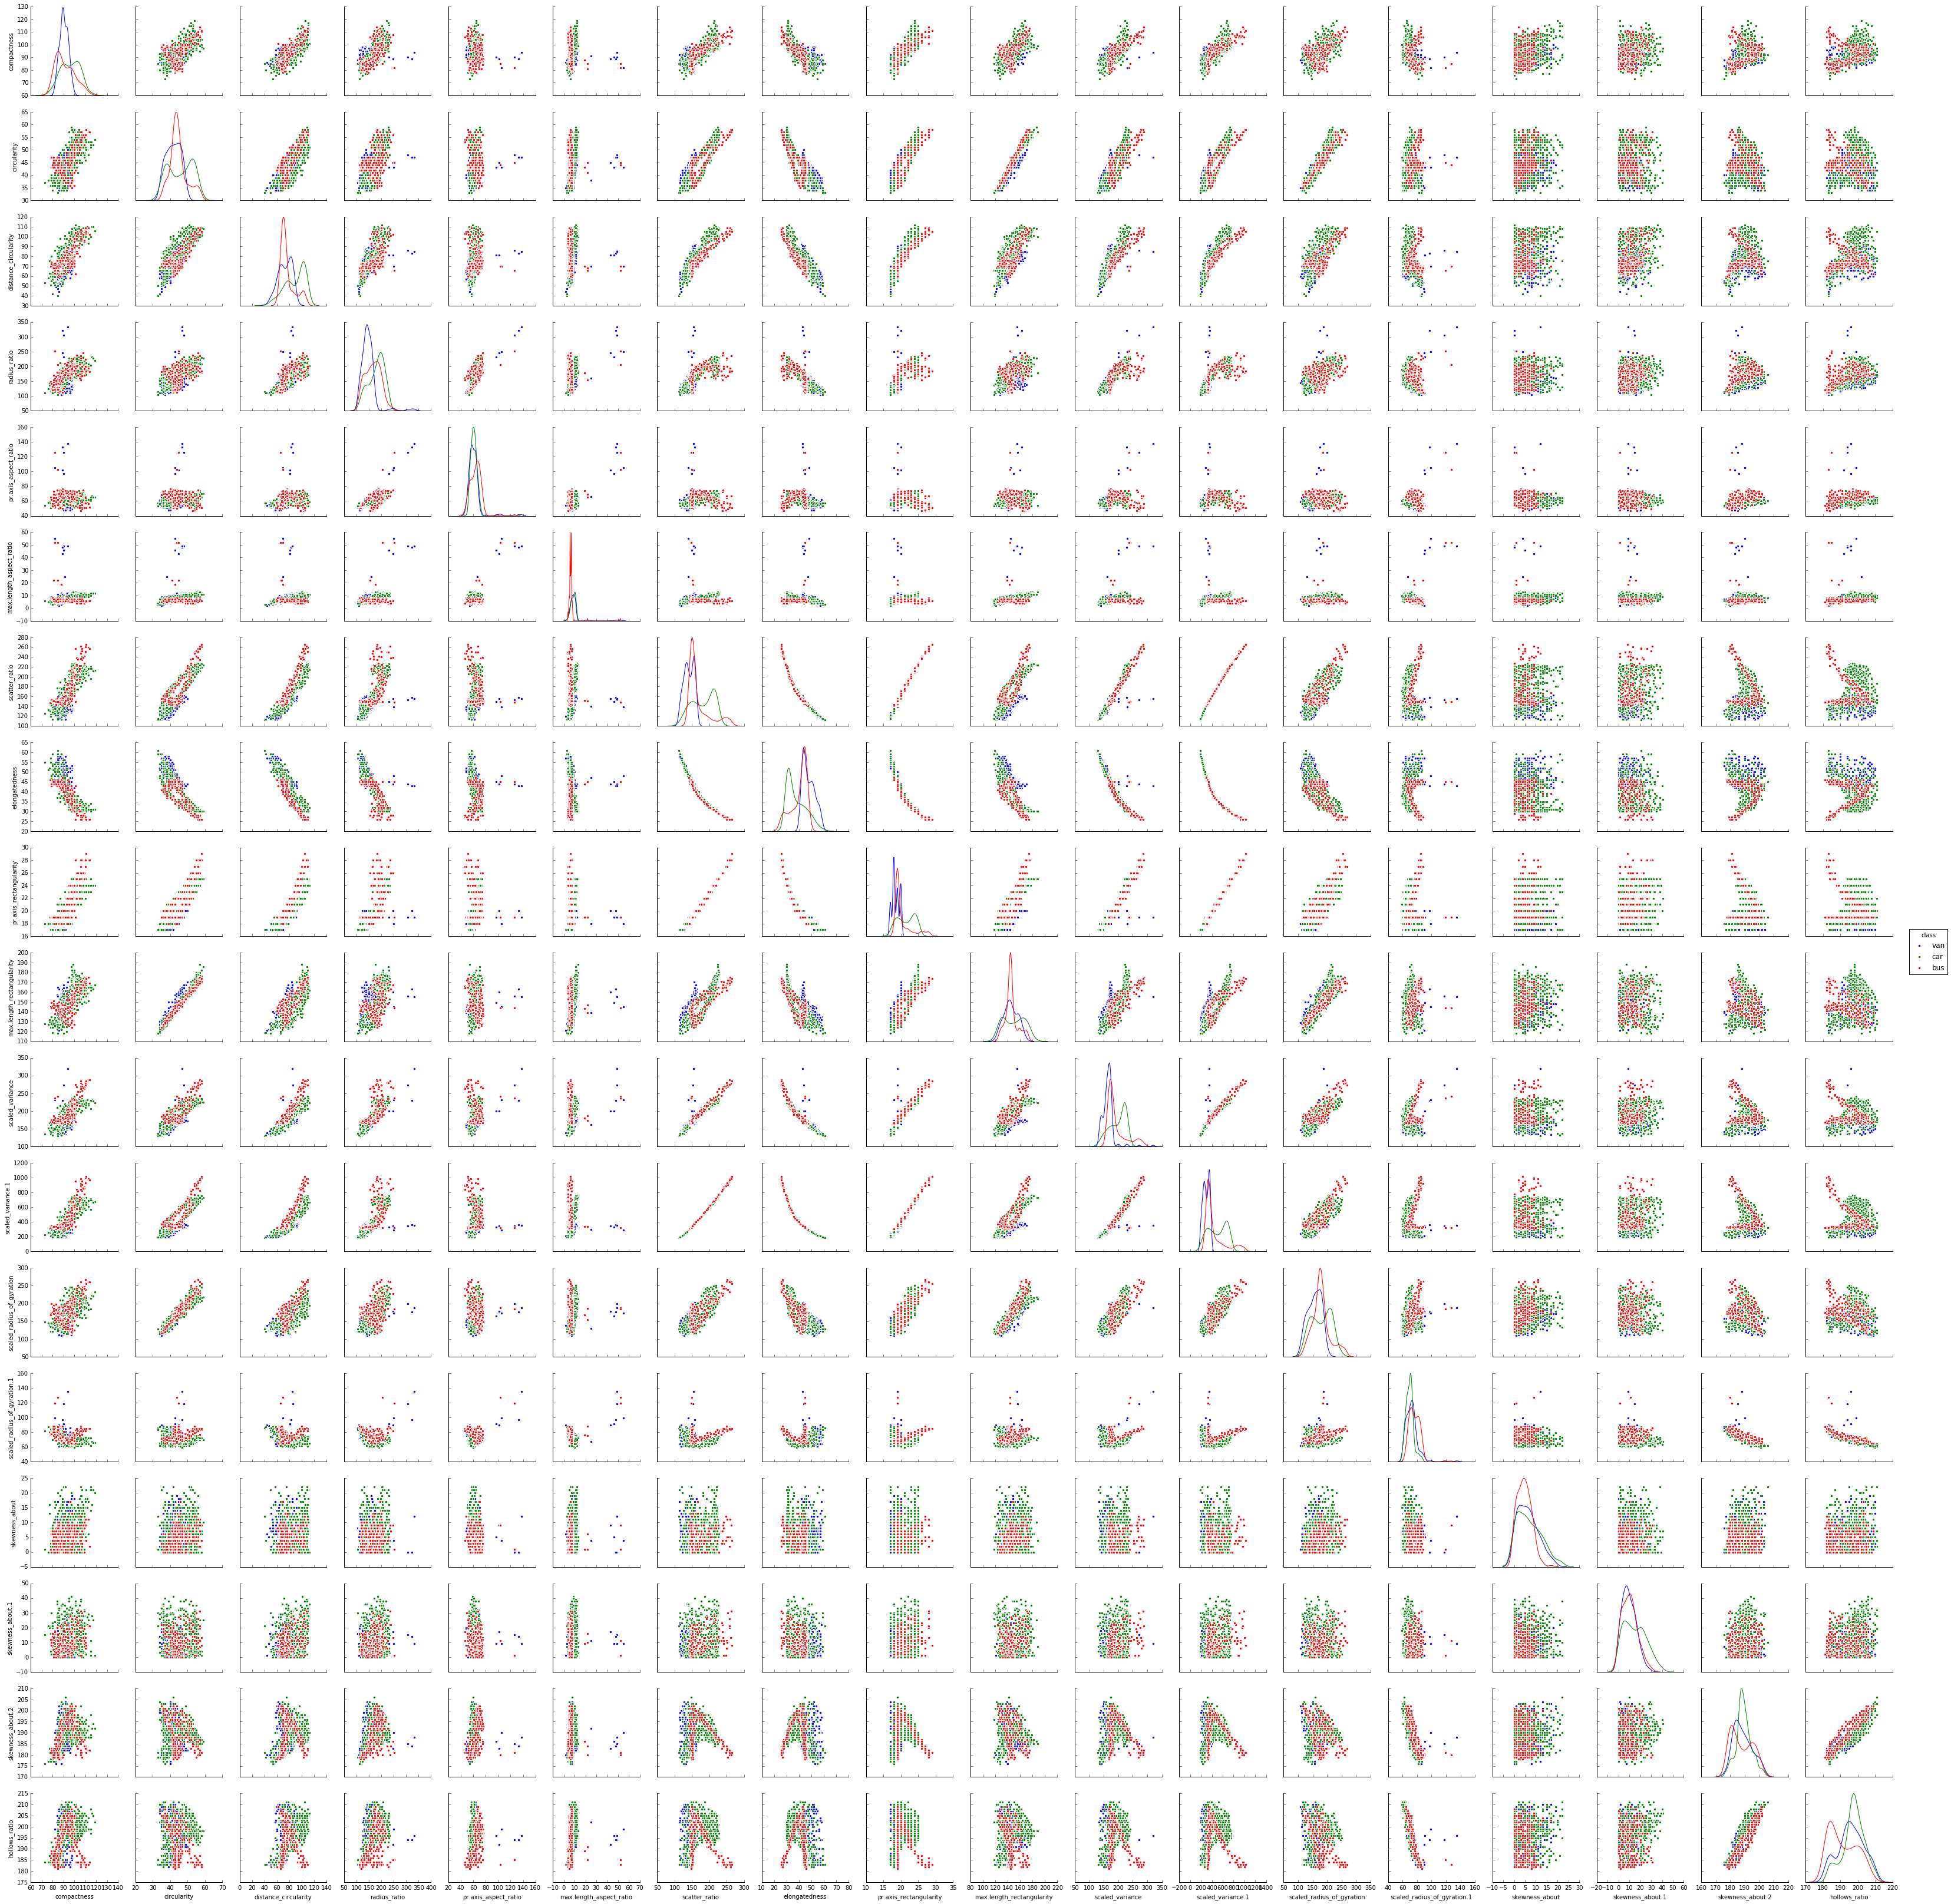

In [9]:
sns.pairplot(df_dropped_na, diag_kind='kde',hue='class') 

### Check for any missing values in the data 

In [10]:
df_dropped_na.columns[df_dropped_na.isna().any() == True]

Index([], dtype='object')

### Observation
> There are no columns that have missing values

### 3. Standardize the data 

In [11]:
df_one_hot_coded = pd.get_dummies(df_dropped_na, columns=['class'])
df_one_hot_coded.sample(10)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
648,105,53.0,105.0,184.0,57.0,11,211.0,31.0,24.0,168,...,661.0,218.0,71.0,0.0,15.0,186.0,197,0,1,0
508,95,46.0,92.0,159.0,63.0,11,160.0,42.0,20.0,157,...,372.0,171.0,70.0,7.0,21.0,189.0,200,0,0,1
304,85,45.0,70.0,130.0,58.0,8,151.0,45.0,19.0,146,...,334.0,187.0,79.0,2.0,5.0,181.0,186,1,0,0
87,86,37.0,60.0,115.0,54.0,5,119.0,56.0,17.0,132,...,209.0,129.0,72.0,2.0,8.0,186.0,190,0,0,1
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,...,270.0,148.0,66.0,0.0,25.0,190.0,195,0,1,0
16,89,36.0,51.0,109.0,52.0,6,118.0,57.0,17.0,129,...,206.0,125.0,80.0,2.0,14.0,181.0,185,0,0,1
772,92,52.0,93.0,204.0,67.0,9,189.0,35.0,22.0,161,...,536.0,240.0,72.0,2.0,5.0,188.0,195,0,1,0
673,91,35.0,66.0,159.0,59.0,7,147.0,45.0,19.0,131,...,322.0,123.0,64.0,1.0,1.0,197.0,203,0,1,0
209,101,56.0,100.0,168.0,55.0,11,214.0,31.0,24.0,175,...,681.0,224.0,74.0,2.0,3.0,185.0,192,0,1,0
311,93,45.0,83.0,142.0,56.0,10,157.0,43.0,20.0,155,...,364.0,188.0,75.0,1.0,21.0,184.0,197,0,0,1


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [12]:
from scipy.stats import zscore
df_zscored = df_one_hot_coded.apply(zscore)
df_zscored.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van
555,-0.808978,0.683198,0.250863,0.622169,0.279250,0.085785,0.255178,-0.511494,0.171712,0.352396,...,0.186213,1.075376,-0.722724,0.945058,-0.637516,0.491213,0.442318,-0.580664,0.984136,-0.561724
448,0.892387,1.334359,0.567853,0.741235,0.404751,-0.556023,1.071830,-1.152637,0.949438,0.904283,...,1.128195,1.230116,0.749558,-0.274839,0.147109,0.491213,-0.504366,1.722165,-1.016120,-0.561724
181,-1.902713,-1.433074,-1.397486,-1.580558,-0.724754,-0.556023,-1.378125,1.796618,-1.383740,-1.648193,...,-1.241033,-1.648047,0.749558,-0.681472,0.371287,-1.785248,-1.451050,-0.580664,0.984136,-0.561724
623,1.500018,1.171568,1.645620,1.128201,0.279250,0.727593,1.586018,-1.280865,1.727163,1.387184,...,1.544951,0.796844,0.080339,3.181535,2.837252,0.166004,1.253762,-0.580664,0.984136,-0.561724
268,-0.930504,-0.944703,-1.397486,-0.866160,-0.222752,-0.342087,-1.499111,1.796618,-1.383740,-0.958335,...,-1.292414,-1.029087,-1.525787,0.131793,-0.525427,1.792048,1.524243,-0.580664,-1.016120,1.780233


In [13]:
df_zscored[(df_zscored < -3) | (df_zscored > 3)].any()

compactness                     True
circularity                    False
distance_circularity           False
radius_ratio                    True
pr.axis_aspect_ratio            True
max.length_aspect_ratio         True
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity          True
max.length_rectangularity      False
scaled_variance                 True
scaled_variance.1               True
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1     True
skewness_about                  True
skewness_about.1                True
skewness_about.2               False
hollows_ratio                  False
class_bus                      False
class_car                      False
class_van                      False
dtype: bool

### Observation
> Clearly there are outliers in the data for multiple columns

In [14]:
df_zscored = df_zscored[(df_zscored > -3) & (df_zscored < 3)].dropna()

In [15]:
df_zscored.shape

(792, 21)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [16]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [17]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn import metrics
cluster_range=range(2,10)               #Cannot iterate over n_clusters = 1 in KMeans 
cluster_sil_scores = []

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [18]:
#Finding optimal no. of clusters
for k in cluster_range:
    clusters=KMeans(n_clusters=k , random_state=1)
    clusters.fit(df_zscored)
    prediction=clusters.predict(df_zscored)
    distortion.append( clusters.inertia_ )
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_sil_scores.append(metrics.silhouette_score(df_zscored, labels, metric='euclidean'))

In [19]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion , "Avg Sil Score": cluster_sil_scores } )
clusters_df.head(10)

,num_clusters,distortion,Avg Sil Score
0,2,8930.315612,0.357079
1,3,7381.803079,0.266783
2,4,6443.324551,0.278619
3,5,5800.943012,0.288407
4,6,5240.552844,0.300456
5,7,4854.732941,0.300762
6,8,4371.215893,0.302769
7,9,4090.468735,0.276185


### 6. Plotting Elbow/ Scree Plot

In [20]:
# importing ploting libraries
import matplotlib.pyplot as plt   
import matplotlib.style

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

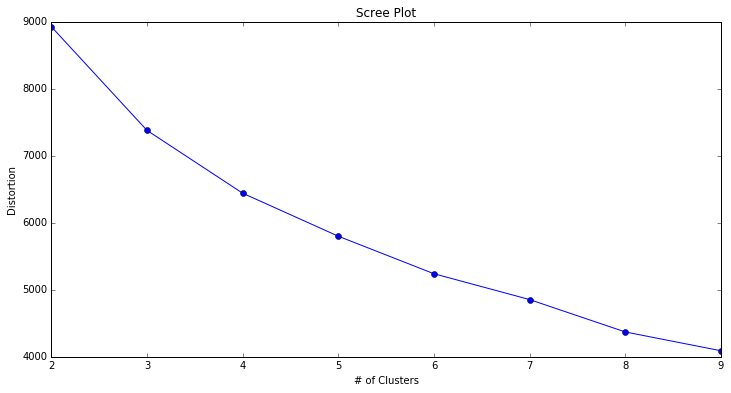

In [21]:
plt.figure(figsize=(12,6))
plt.title('Scree Plot')
plt.xlabel('# of Clusters')
plt.ylabel('Distortion')
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )

### Find out the optimal value of K

#### Observation
> Choosing value of K as 8, since we can see a higher rate of drop using the Scree plot

In [22]:
clusters=KMeans(n_clusters=8 , random_state=1)
clusters.fit(df_zscored)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [23]:
clusters.cluster_centers_

array([[-0.98167313, -1.09549858, -1.28136754, -1.31767194, -0.80533841,
        -0.58529831, -1.0925359 ,  1.34714374, -1.00306328, -1.15657844,
        -1.16929622, -1.02835857, -0.91734893,  0.86367772,  0.21525953,
        -0.12190572, -1.17419807, -1.314386  , -0.58066432,  0.28930999,
         0.25179795],
       [-0.24905791, -0.65891634, -0.07551965,  0.04998931, -0.19765173,
        -0.16618409, -0.24019005,  0.0783566 , -0.28916261, -0.71100781,
        -0.16718443, -0.28158574, -0.62286638, -0.75643246, -0.06700514,
         0.42027433,  0.65381768,  0.57254998, -0.58066432,  0.98413566,
        -0.56172411],
       [ 1.13015566,  1.18729701,  1.28483268,  1.01747508,  0.14586803,
         0.38653537,  1.22145415, -1.16812342,  1.22370803,  1.14523383,
         1.07017857,  1.20337685,  1.02260019, -0.33412399,  0.19268952,
         0.26894476,  0.04817522,  0.44231829, -0.58066432,  0.98413566,
        -0.56172411],
       [-0.32011181,  0.08568418, -0.09278334, -0.61179094

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [24]:
pd.DataFrame(clusters.cluster_centers_, columns=df_one_hot_coded.columns).T

,0,1,2,3,4,5,6,7
compactness,-0.981673,-0.249058,1.130156,-0.320112,-0.405652,-0.004928,-1.194055,1.286299
circularity,-1.095499,-0.658916,1.187297,0.085684,-0.911674,-0.350330,-0.183709,1.317518
distance_circularity,-1.281368,-0.075520,1.284833,-0.092783,-0.800258,-0.424400,-0.855929,1.018198
radius_ratio,-1.317672,0.049989,1.017475,-0.611791,-0.664696,0.418995,-0.941473,0.670412
pr.axis_aspect_ratio,-0.805338,-0.197652,0.145868,-0.125774,-0.133628,0.854218,-0.234848,-0.382873
max.length_aspect_ratio,-0.585298,-0.166184,0.386535,0.253530,-0.171558,-0.501295,-0.272493,-0.644548
scatter_ratio,-1.092536,-0.240190,1.221454,-0.481733,-1.091442,-0.193593,-0.564024,1.857192
elongatedness,1.347144,0.078357,-1.168123,0.432734,1.198219,-0.095497,0.511244,-1.559431
pr.axis_rectangularity,-1.003063,-0.289163,1.223708,-0.460190,-1.023055,-0.280454,-0.606014,1.888072
max.length_rectangularity,-1.156578,-0.711008,1.145234,0.408839,-0.673393,-0.483455,-0.224425,1.011330


### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [25]:
centroid_df = pd.DataFrame(clusters.cluster_centers_, columns=df_one_hot_coded.columns)

Hint: Use pd.Dataframe function 

In [26]:
centroid_df.T

,0,1,2,3,4,5,6,7
compactness,-0.981673,-0.249058,1.130156,-0.320112,-0.405652,-0.004928,-1.194055,1.286299
circularity,-1.095499,-0.658916,1.187297,0.085684,-0.911674,-0.350330,-0.183709,1.317518
distance_circularity,-1.281368,-0.075520,1.284833,-0.092783,-0.800258,-0.424400,-0.855929,1.018198
radius_ratio,-1.317672,0.049989,1.017475,-0.611791,-0.664696,0.418995,-0.941473,0.670412
pr.axis_aspect_ratio,-0.805338,-0.197652,0.145868,-0.125774,-0.133628,0.854218,-0.234848,-0.382873
max.length_aspect_ratio,-0.585298,-0.166184,0.386535,0.253530,-0.171558,-0.501295,-0.272493,-0.644548
scatter_ratio,-1.092536,-0.240190,1.221454,-0.481733,-1.091442,-0.193593,-0.564024,1.857192
elongatedness,1.347144,0.078357,-1.168123,0.432734,1.198219,-0.095497,0.511244,-1.559431
pr.axis_rectangularity,-1.003063,-0.289163,1.223708,-0.460190,-1.023055,-0.280454,-0.606014,1.888072
max.length_rectangularity,-1.156578,-0.711008,1.145234,0.408839,-0.673393,-0.483455,-0.224425,1.011330


In [27]:
centroid_df.shape

(8, 21)

### Use kmeans.labels_ function to print out the labels of the classes

In [28]:
clusters.labels_

array([3, 3, 2, 4, 5, 4, 4, 4, 1, 5, 3, 5, 2, 0, 5, 2, 6, 0, 5, 5, 2, 3,
       0, 2, 5, 0, 3, 1, 1, 2, 1, 6, 2, 6, 2, 0, 3, 1, 3, 3, 6, 3, 1, 0,
       1, 2, 5, 7, 4, 1, 3, 2, 0, 2, 0, 0, 6, 5, 0, 2, 3, 5, 2, 1, 0, 3,
       2, 1, 6, 6, 7, 4, 0, 5, 3, 0, 5, 0, 2, 1, 2, 3, 6, 2, 0, 6, 2, 6,
       4, 4, 4, 5, 2, 1, 6, 5, 4, 3, 0, 0, 3, 3, 2, 2, 5, 0, 3, 4, 3, 3,
       6, 6, 3, 7, 2, 1, 0, 2, 3, 4, 0, 3, 1, 2, 6, 1, 2, 3, 5, 1, 4, 2,
       5, 1, 2, 3, 7, 1, 3, 1, 0, 2, 1, 1, 2, 2, 1, 2, 6, 0, 2, 7, 3, 7,
       3, 5, 1, 5, 3, 2, 0, 5, 0, 2, 5, 5, 1, 2, 1, 2, 3, 7, 1, 6, 2, 6,
       6, 6, 3, 1, 2, 2, 4, 3, 1, 6, 2, 1, 4, 5, 7, 0, 0, 2, 6, 4, 2, 3,
       6, 0, 4, 2, 4, 2, 0, 0, 0, 6, 2, 4, 3, 5, 2, 6, 1, 1, 6, 2, 3, 0,
       5, 1, 2, 0, 2, 3, 5, 3, 2, 1, 1, 2, 2, 0, 1, 4, 4, 2, 6, 1, 4, 0,
       6, 1, 4, 7, 5, 6, 0, 2, 5, 1, 6, 6, 2, 3, 6, 2, 0, 4, 5, 4, 7, 5,
       5, 0, 1, 5, 2, 1, 5, 4, 6, 5, 2, 2, 2, 2, 3, 6, 2, 6, 0, 4, 1, 0,
       2, 6, 2, 1, 6, 2, 1, 4, 4, 2, 2, 6, 7, 2, 3,

In [29]:
df_zscored['cluster'] = clusters.labels_
df_zscored.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,...,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class_bus,class_car,class_van,cluster
335,1.864596,1.497149,1.328629,1.068668,0.153750,0.513657,1.616264,-1.409094,1.727163,1.870085,...,1.199168,-0.187348,-0.071523,0.147109,-0.321809,0.577559,-0.580664,0.984136,-0.561724,2
656,-1.173556,-0.456333,-0.383118,-0.389895,0.279250,-0.342087,-0.531227,0.386105,-0.606014,-0.337462,...,-0.533920,0.348027,-1.291420,0.819644,-0.321809,-0.369125,1.722165,-1.016120,-0.561724,6
119,-0.079822,0.683198,-0.192923,0.324503,0.404751,-0.342087,0.134193,-0.511494,0.171712,0.697326,...,0.611156,-0.321192,-0.274839,-0.301249,1.304235,0.848040,1.722165,-1.016120,-0.561724,5
493,1.013913,1.497149,1.011639,0.235204,-0.724754,0.299721,1.525525,-1.280865,1.727163,1.594142,...,1.508648,-0.053505,-0.274839,0.483376,-0.484413,0.036596,-0.580664,0.984136,-0.561724,2
269,-1.295083,-1.270284,-1.270690,-1.669858,-1.101255,-0.556023,-1.408372,1.796618,-1.383740,-1.303264,...,-1.214775,0.883402,-1.291420,-0.637516,-1.297435,-1.451050,-0.580664,-1.016120,1.780233,0


In [30]:
df_zscored['cluster'].value_counts()

2    207
1    135
0     95
3     88
5     86
6     83
4     69
7     29
Name: cluster, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a341246d8>,
      dtype=object)

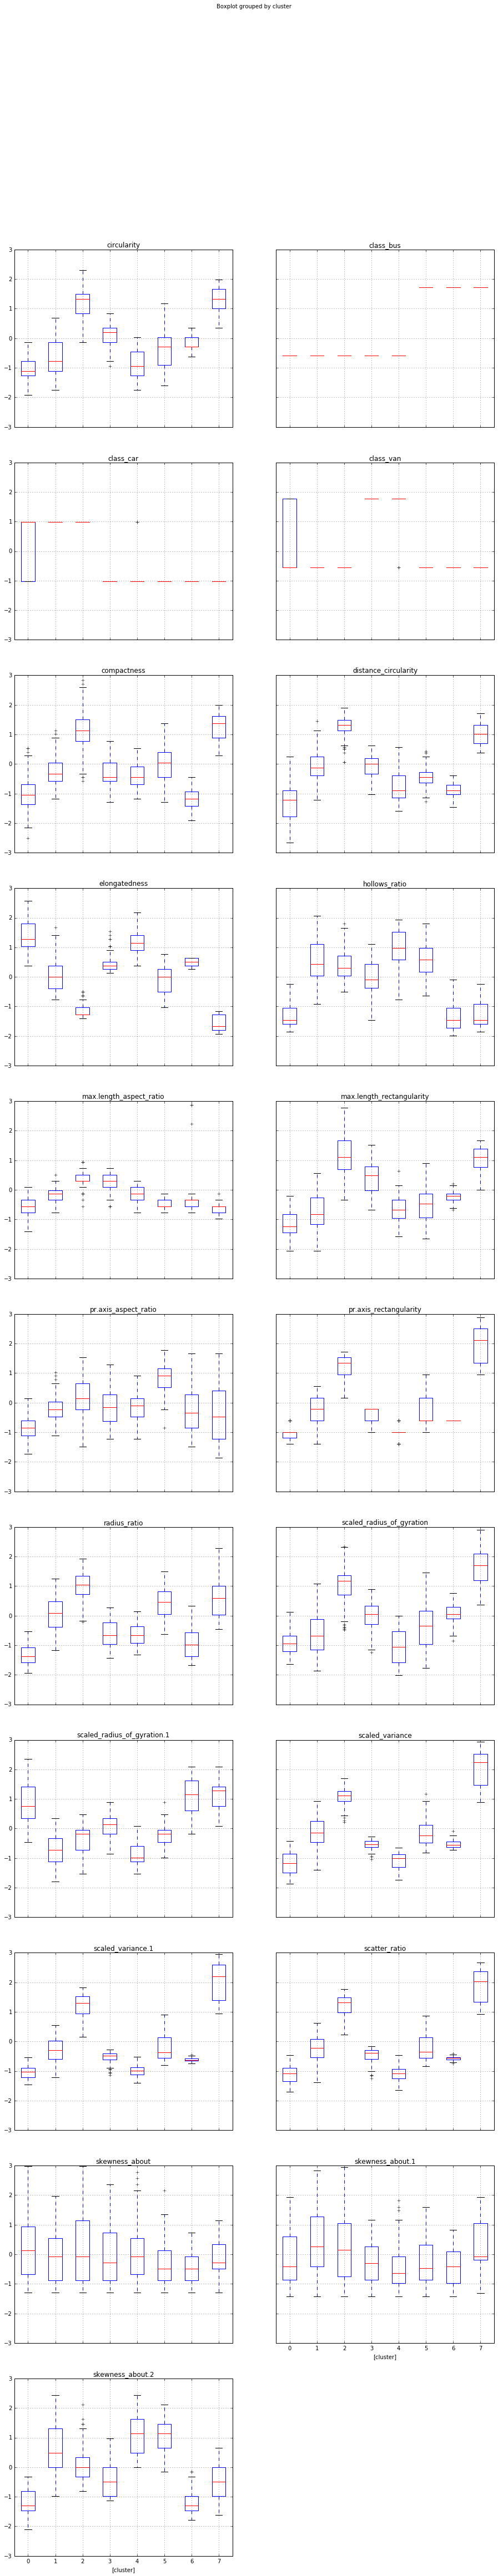

In [31]:
df_zscored.boxplot(by = 'cluster',  layout=(11,2), figsize=(15, 77))